# Causal Analysis of Smoking on Lung Cancer

Hanpeng Yang

002837630

## Abstract

This notebook demonstrates the importance of data preparation in causal analysis for machine learning. We perform feature selection, one-hot encoding, and address class imbalance using SMOTE. Propensity score matching (PSM) is applied to control for confounders between the treatment (smoking) and control (non-smoking) groups. The analysis estimates the Average Treatment Effect (ATE) of smoking on lung cancer, finding a 7.2% increase in the probability of lung cancer due to smoking. These steps highlight the role of effective data preparation in ensuring valid causal inferences.

## Introduction to Causality in Machine Learning

In the realm of machine learning, the primary objective often revolves around making accurate predictions based on historical data. Traditional machine learning models excel at identifying patterns and correlations within datasets, enabling them to forecast future outcomes with considerable precision. However, these models typically fall short when it comes to understanding the underlying mechanisms that drive these patterns. This is where the concept of causality becomes indispensable.

### Why We Need Causality

Causality extends beyond mere correlation by aiming to uncover the cause-and-effect relationships between variables. While correlation can indicate that two variables move together, causality seeks to determine whether changes in one variable directly result in changes in another. This distinction is crucial, especially in fields where interventions based on model predictions can have significant real-world implications. For instance, in healthcare, understanding whether a particular treatment causes an improvement in patient outcomes is far more valuable than knowing that the treatment is merely associated with better health. Without causal insights, decisions based solely on predictive correlations risk being ineffective or even harmful, as they may not address the true drivers of the observed outcomes.

### What Causal Inference Does

Causal inference provides the framework and methodologies necessary to identify and estimate causal relationships from data. It enables researchers and practitioners to move from descriptive analytics, which tells us what is happening, to prescriptive analytics, which explains why it is happening and what actions can influence future outcomes. By leveraging causal inference, one can discern whether an observed association between variables is indicative of a direct causal effect or if it is confounded by other underlying factors. This capability is essential for tasks such as policy evaluation, where understanding the impact of interventions is paramount, and for developing models that can generalize across different environments by relying on stable causal relationships rather than transient correlations.

### When: Suitable Datasets for Sound Causal Inference

The quality and characterization of the dataset is critical for making reliable causal inferences. First, the dataset should contain rich and relevant information covering all necessary variables in the causal pathway, including treatment variables (i.e., intervention or exposure) and potential confounding variables. The presence of these variables helps to accurately estimate causal effects and avoid confounding causality. In addition, the dataset should have a sufficient sample size to provide enough statistical power to detect causal effects, reduce estimation error, and improve the reliability of causal inferences. Ideally, data should come from randomized controlled trials (RCTs) because randomization is effective in eliminating the effects of confounding variables. However, in cases where RCTs are not possible, observational datasets can also be used for causal inference, but confounders need to be controlled through rigorous methods to ensure unbiased causal estimates. And the time series data can also enhance the credibility of causal inference because it can help establish the temporal sequence of events. In addition, data completeness and accuracy are equally important, and missing values and noise need to be handled appropriately to avoid biasing the results of causal inference.

### How: Methods to Construct Causal Analysis on Datasets

Constructing a causal analysis on a dataset involves a series of methodical steps that integrate both theoretical and empirical approaches. The process typically begins with defining the causal question of interest and specifying the causal model, often using Directed Acyclic Graphs (DAGs) to visually represent the hypothesized relationships between variables. This graphical representation helps in identifying confounders, mediators, and colliders, which are critical for determining the appropriate adjustment sets for estimating causal effects.

Once the causal model is established, various statistical and computational methods can be employed to estimate the causal effects. Techniques such as propensity score matching, instrumental variables, and difference-in-differences are commonly used in observational studies to address confounding and selection biases. 

Combining these methods  allows analytist to not only estimate the magnitude of causal effects but also to validate the assumptions underlying the causal model. Sensitivity analyses and robustness checks are essential components of this process, ensuring that the causal inferences drawn are not artifacts of model misspecification or unaccounted confounders. Ultimately, our goal is to construct a causal analysis that is both theoretically grounded and empirically validated, providing actionable insights that inform decision-making and drive meaningful interventions.


## Data preprocessing and causal inference

Data preprocessing is a crucial step in the process of causal inference. Through proper data preprocessing, the quality, validity, and applicability of data to causal inference can be ensured. Good data preprocessing not only helps to clean up the noise in the data, but also helps to reveal potential causal relationships and reduce the interference of confounding factors. In order to achieve accuracy in causal inference, data preprocessing needs to include a series of techniques and methods covering a variety of aspects such as processing of missing data, feature selection, and coding of categorical variables. Each step is providing a more accurate data base for the final causal inference model.

### Missing Data

Missing data is one of the common challenges in machine learning and causal inference, and mishandling it can seriously affect the analysis results. In real datasets, missing data can arise from a variety of reasons, such as omissions during data collection or biases in sample selection. The method of handling missing data should be determined by the type of missing data. In the case of fewer missing data, the option of deleting records containing missing values is usually available. However, when there is a large amount of missing data, a simple deletion method may result in a serious loss of data volume, which requires the use of padding methods, such as mean padding, median padding, or regression padding techniques. The treatment of missing data is crucial for causal inference, because different treatment methods may have different impacts on the estimation of causal effects, and wrong filling methods may distort the true picture of causality.

### Feature Selection

Feature selection is a important step in causal inference. The purpose of feature selection is to select those variables from the dataset that are most relevant to causality, thereby avoiding the interference of redundant and irrelevant features and improving the accuracy and interpretability of the model. Feature selection can be accomplished by correlation analysis, where we usually screen out features with high correlation with the target variable, but this method may not be sufficient because correlation is not equivalent to causation. In causal inference, the use of causal diagrams (e.g., directed acyclic graphs, DAGs) to visualize causal relationships between variables can help identify which variables are key variables in the causal chain. By removing variables that are less related to the causal effect, it not only improves the accuracy of the model, but also makes the estimation of the causal effect more reliable.

### Categorical Variables

The treatment of categorical variables is also important in causal inference. Since many datasets contain categorical variables, these variables usually need to be coded in order to enter the machine learning model. Traditional coding methods include solo heat coding and label coding, but in causal inference, more care needs to be taken in how category variables are handled. Solo thermal coding converts each category variable into multiple binary feature columns, which is effective for most machine learning models, but it can pose problems in causal inference, such as the multicollinearity problem. Such problems may affect the accuracy of the relationships between variables in causal inference, so special attention needs to be paid to the relationships between variables when using solo thermal coding. Another approach is goal coding, which codes each category based on its target value (e.g., the mean value of the category), which is particularly useful in causal inference because it captures the potential relationship between the category variables and the target variable. However, target coding also needs to avoid the problem of information leakage and ensure the clarity of causal paths. In addition, causal graph methods can also provide guidance in the treatment of categorical variables, helping analysts to identify which categorical variables play an important role in the causal path and to ensure that these variables are coded in a way that does not mislead causal inference.

The handling of missing data, the optimization of feature selection, and the correct coding of categorical variables are all effective in avoiding bias and noise in the data, thereby improving the reliability and accuracy of causal inference models. Through a well-designed data preprocessing process, researchers are able to reveal causal relationships more clearly and obtain more robust results in subsequent causal effect estimation.

## Python Code Example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df = pd.read_csv('survey lung cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


Look at the first few rows of the data, for Gender column, M is male F is female, Age is the patient's age, and the other columns are the responses to the corresponding questions, with 1 for no and 2 for yes.

In [3]:
# apply one-hot encoding to the dataset
df['GENDER'] = df['GENDER'].apply(lambda x: {'M': 1, 'F': 0}.get(x, x)) # 0 for female, 1 for male
df['LUNG_CANCER'] = df['LUNG_CANCER'].apply(lambda x: {'YES': 1, 'NO': 0}.get(x, x))
df.iloc[:, 2:-1] -= 1
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


We use one-hot encoding method, setting all "No" to 0 and "Yes" to 1.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [5]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

Based on the information provided in the previous output, we know that there are 309 rows and 16 columns in this dataset and there are no missing values in this dataset.

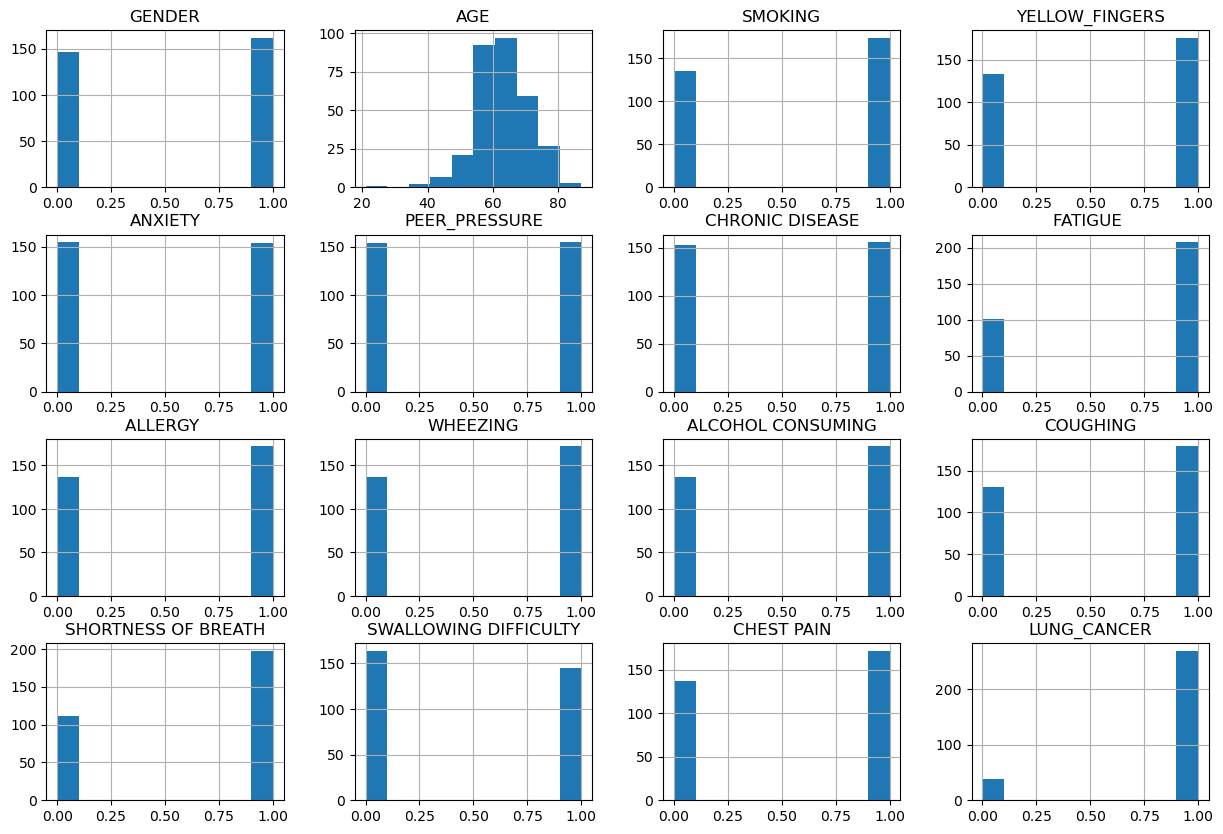

In [6]:
# plot the histgram for each feature
df.hist(figsize=(15, 10));

The age follows a normal distribution has a mean around 60, and the distributions of other features are relatively uniform. However, the 'lung cancer' column is highly imbalanced, with far more people having lung cancer than not.

SMOTE (Synthetic Minority Over-sampling Technique) is an effective method for handling class imbalance, especially when we're dealing with medical datasets where the number of cases in the minority class is much smaller. It generates synthetic samples for the minority class by interpolating between existing examples, which can improve model performance by giving the model more examples to learn from without simply duplicating minority class instances.

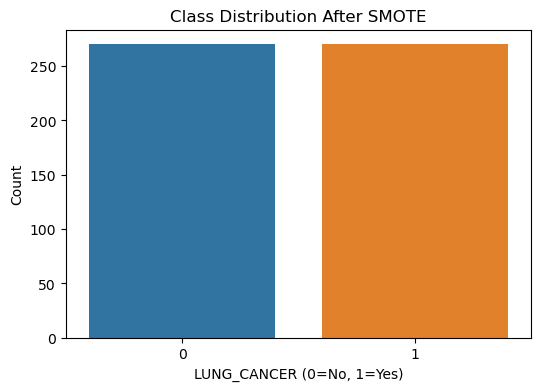

In [7]:
from imblearn.over_sampling import SMOTE

# Define feature matrix X and target vector y
# Exclude the target variable and any identifier columns if present
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']

# Apply SMOTE to generate synthetic samples for the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert resampled data back to DataFrame for convenience
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                          pd.Series(y_resampled, name='LUNG_CANCER')], axis=1)

# Visualize the new class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='LUNG_CANCER', data=df_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('LUNG_CANCER (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()


The target variable 'lung cancer' is now balanced through SMOTE.

To select the key features based on their correlation with the target variable ('lung cancer'), we can filter the correlation matrix and focus on the column that corresponds to the target.

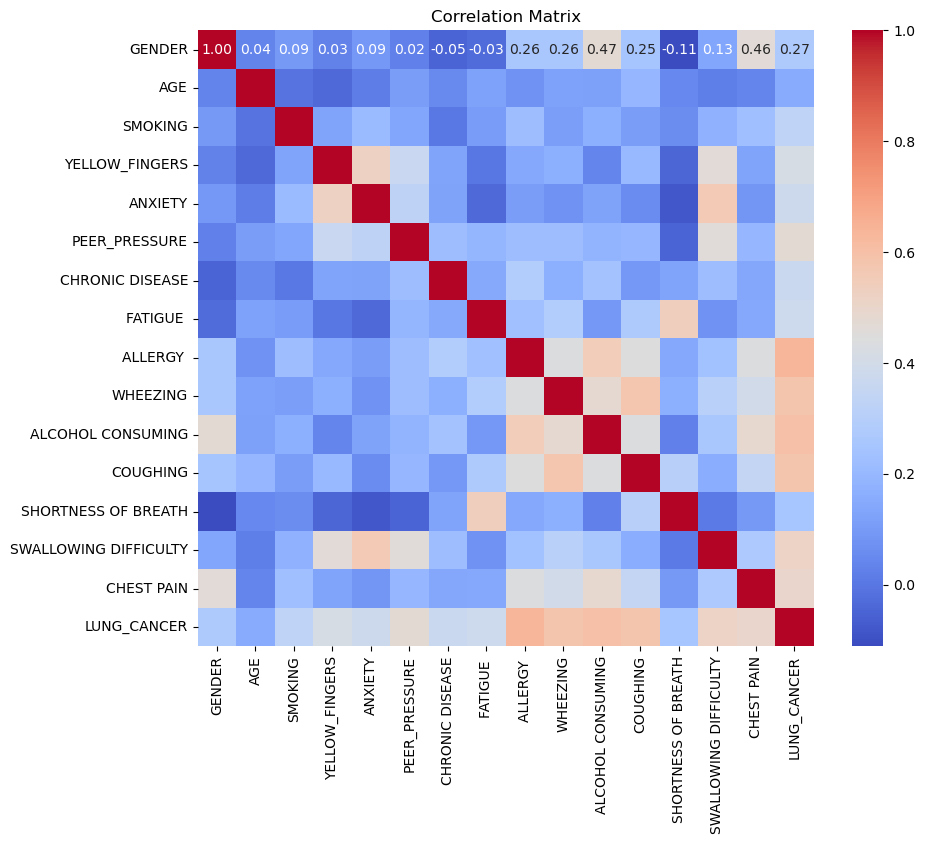

In [8]:
# Compute the correlation matrix
corr_matrix = df_resampled.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

In [9]:
df_resampled.corr()['LUNG_CANCER'].sort_values(ascending=False)

LUNG_CANCER              1.000000
ALLERGY                  0.638954
ALCOHOL CONSUMING        0.598797
COUGHING                 0.583097
WHEEZING                 0.583039
SWALLOWING DIFFICULTY    0.516793
CHEST PAIN               0.499644
PEER_PRESSURE            0.473735
YELLOW_FINGERS           0.415808
FATIGUE                  0.381547
ANXIETY                  0.377541
CHRONIC DISEASE          0.368841
SMOKING                  0.331202
GENDER                   0.271754
SHORTNESS OF BREATH      0.252191
AGE                      0.150622
Name: LUNG_CANCER, dtype: float64

In [10]:
# Select features with correlation > 0.4
index = df_resampled.corr()['LUNG_CANCER'] > 0.4
selected_features = df_resampled.columns[index][:-1]

print("\nSelected Features based on correlation > 0.4:")
print(selected_features)

# Define X and y with selected features
X_selected = df_resampled[selected_features]
y_selected = df_resampled['LUNG_CANCER']



Selected Features based on correlation > 0.4:
Index(['YELLOW_FINGERS', 'PEER_PRESSURE', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import classification_report, roc_auc_score

# Define treatment and covariates
treatment = df_resampled['SMOKING']  # 0=No, 1=Yes
covariates = df_resampled[selected_features]

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(covariates, treatment)

# Predict propensity scores
df_resampled['propensity_score'] = log_reg.predict_proba(covariates)[:,1]

print("\nSample Propensity Scores:")
print(df_resampled[['SMOKING', 'propensity_score']].head())


Sample Propensity Scores:
   SMOKING  propensity_score
0        0          0.518089
1        1          0.623027
2        0          0.384205
3        1          0.579350
4        0          0.275698


We calculated the propensity scores (PSM) using a logistic regression model. These scores represent the probability that an individual receives the treatment (e.g., `SMOKING = 1`) based on the covariates.

Matched Dataset Shape: (444, 17)


C:\Users\hanpeng\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hanpeng\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hanpeng\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hanpeng\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

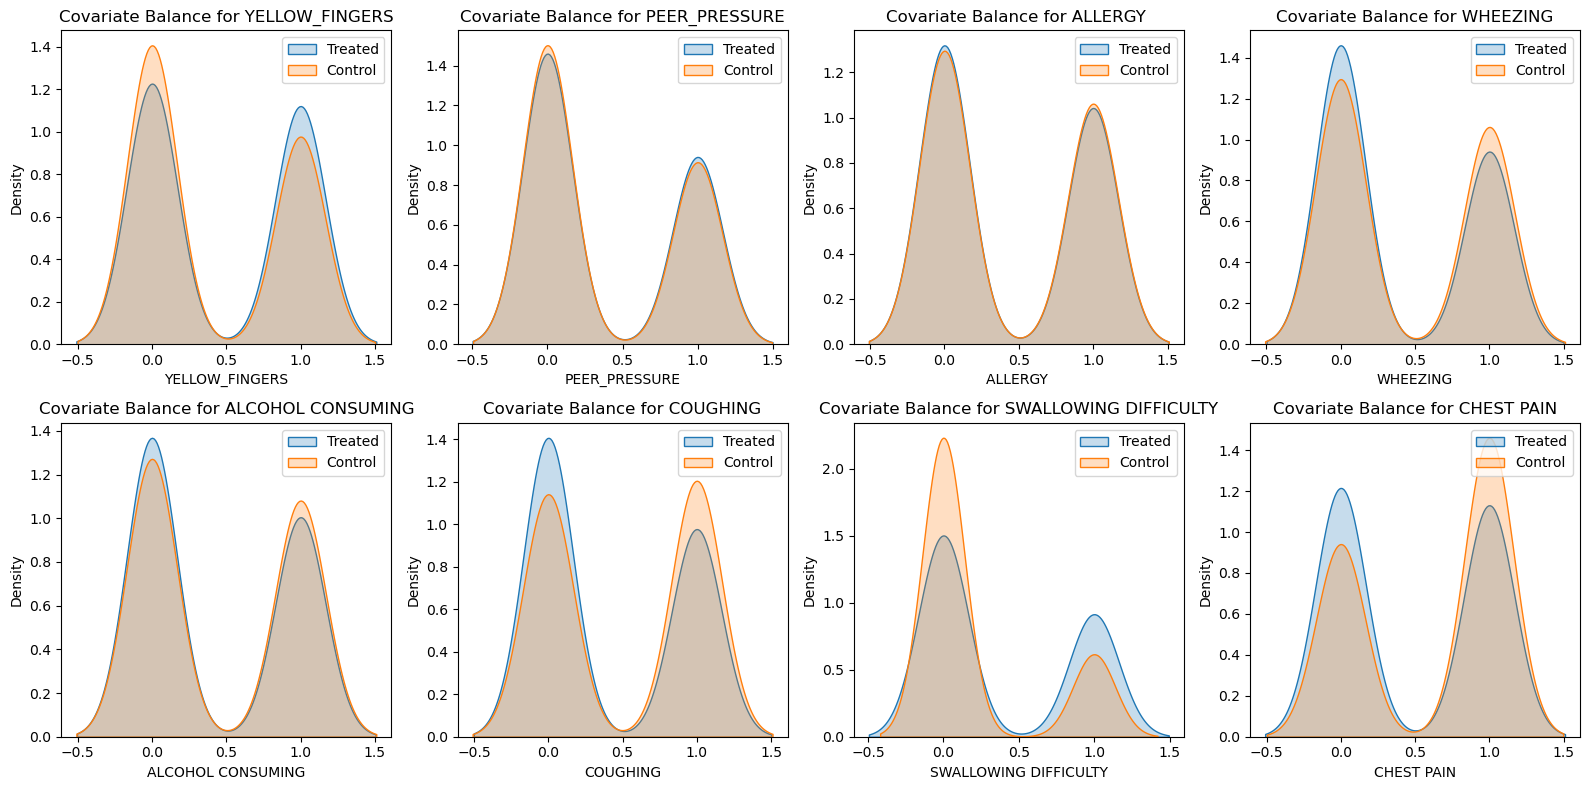

In [12]:
# Separate treated and control groups
treated = df_resampled[df_resampled['SMOKING'] == 1]
control = df_resampled[df_resampled['SMOKING'] == 0]

# Perform nearest neighbor matching
nn = NearestNeighbors(n_neighbors=1, metric='euclidean')
nn.fit(control[['propensity_score']])
distances, indices = nn.kneighbors(treated[['propensity_score']])
matched_control = control.iloc[indices.flatten()]
matched_df = pd.concat([treated, matched_control], axis=0)

print("Matched Dataset Shape:", matched_df.shape)

# Evaluate covariate balance
def plot_covariate_balance(matched_df, covariate, ax):
    treated_cov = matched_df[matched_df['SMOKING'] == 1][covariate]
    control_cov = matched_df[matched_df['SMOKING'] == 0][covariate]
    
    sns.kdeplot(treated_cov, fill=True, label='Treated', ax=ax)
    sns.kdeplot(control_cov, fill=True, label='Control', ax=ax)
    ax.set_title(f'Covariate Balance for {covariate}')
    ax.set_xlabel(covariate)
    ax.set_ylabel('Density')
    ax.legend()

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, cov in enumerate(selected_features):
    plot_covariate_balance(matched_df, cov, axes[i])

plt.tight_layout()
plt.show()

After calculating the propensity scores, we use **Nearest Neighbor Matching** (NN matching) to pair individuals from the treated and control groups based on their propensity scores. The nearest neighbors will be those with the closest propensity scores.

As can be seen from the plots, the covariates are balanced because the curves approximately overlap.

In [13]:
treated_outcome = matched_df[matched_df['SMOKING'] == 1]['LUNG_CANCER'].mean()
matched_control_outcome = matched_df[matched_df['SMOKING'] == 0]['LUNG_CANCER'].mean()
ATE = treated_outcome - matched_control_outcome

print(f"\nEstimated Average Treatment Effect (ATE) of Smoking on Lung Cancer: {ATE}")


Estimated Average Treatment Effect (ATE) of Smoking on Lung Cancer: 0.072072072072072


The ATE of 0.072 implies that smoking is associated with an approximately 7.2% increase in the likelihood of developing lung cancer, after controlling for confounders through propensity score matching.

## Conclusion

In this notebook, we demonstrated the importance of data preparation in causal analysis for machine learning. First, we performed **feature selection** to identify relevant variables, ensuring that only the most important predictors were used. We then applied **one-hot encoding** to convert categorical variables into binary format, making them suitable for machine learning models.

We also addressed the **class imbalance** in the target variable, `LUNG_CANCER`, using **SMOTE** to generate synthetic samples for the minority class, ensuring that the model was not biased toward the majority class. After balancing the dataset, we applied **propensity score matching (PSM)** to control for confounders and ensure that the treatment (smoking) and control (non-smoking) groups were comparable.

Finally, we estimated the **Average Treatment Effect (ATE)** of smoking on lung cancer, finding it to be **0.072**, indicating that smoking increases the probability of developing lung cancer by 7.2% on average.

Overall, effective data preparation is essential for ensuring robust causal analysis and drawing valid conclusions in machine learning.

## Reference

https://dango.rocks/blog/2019/01/08/Causal-Inference-Introduction1/

https://blog.csdn.net/sinat_26917383/article/details/119887208

https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer

## License 

This work is licensed under the MIT License. You are free to use, modify, and distribute this work, provided that you include a copy of this license in any distributed version of the work. The work is provided "as is", without warranty of any kind, either express or implied, including but not limited to the warranties of merchantability, fitness for a particular purpose, and noninfringement. In no event shall the authors or copyright holders be liable for any claim, damages, or other liability, whether in an action of contract, tort, or otherwise, arising from, out of, or in connection with the work or the use or other dealings in the work.